<a href="https://colab.research.google.com/github/brunolunarj/cienciadedados/blob/MVP-JUD/MPV2023JUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP PUCRIO - Análise de Dados de Benefícios Judiciais do INSS em 2022**

**Por Bruno de Amorim Luna**

## 1 - DEFINIÇÃO DO PROBLEMA
---




O **Instituto Nacional de Seguro Social - INSS** caracteriza-se como uma organização pública prestadora de serviços previdenciários para a sociedade brasileira.
Fazer análise dos dados Previdenciários dos benefícios de **CONCEDIDOS JUDICIALMENTE no ano de 2022** pelo **INSS** e verificar insigts para melhorar a análise e concessão dos benefícios judiciais, além de analisar a RMI (Renda Mensal) e onde estão as concessões buscando dados para melhorá-las. <br>
Os dados foram retirados dos Dados Abertos do Instituto (https://dados.gov.br/dados/organizacoes/visualizar/instituto-nacional-de-seguro-social-inss).



**Dicionário de Dados - Atributos (COLUNAS)**
>**0   Competência concessão** - Mês que foi concedido o benefício <br>
>**1   Espécie** - Espécie do Benefício Previdenciário <br>
>**2   CID** - Codigo Internacional de Doenças <br>
>**3   Dt Nascimento** - Data de nascimento Segurado do benefício <br>
>**4   Sexo.** - Sexo Masculino ou Feminino <br>
>**5   Clientela** - Especificação do benefício por zona (Rural e Urbana) <br>
>**6   Mun. Resid** - Município do Segurado do benefício <br>
>**7   UF Resid** - UF do Segurado do benefício <br>
>**8  Forma Filiação** - Filiação do Segurado no momento da concessão <br>
>**9   UF** - Estado da concessão do benefício <br>
>**10  Qt SM RMI** - Quantidade de Salário Mínimo da Renda Mensal Inicial(RMI) <br>

## 2 - COLETA E ANÁLISE INICIAL DOS DADOS

---



### 2.1 - IMPORTAÇÃO DE PACOTES E COLETA DOS DADOS

In [1]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder  # one-hot encoding e dummy encoding
from sklearn.model_selection import train_test_split
#from google.colab import drive
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#Carregando planilhas do Excel com os dados em dataframes
df_ben =  pd.read_excel('https://github.com/brunolunarj/cienciadedados/blob/43c383468acfc97512008f90c0ce7c6853ec575a/JUDICIAL/Judicial.xlsx?raw=true')
#df_ben =  pd.read_excel('/content/Judicial.xlsx') 
display(df_ben[:-5])
df_ben.shape

,Competência concessão,Espécie,CID,Dt Nascimento,Sexo,Clientela,Mun Resid.3,UF Resid,Forma Filiação,UF,Qt SM RMI
0,202201,Auxílio Doenca Previdenciário,Em Branco,1965-05-25,Masculino,Rural,Maceió,AL,Segurado Especial,Alagoas,1.0
1,202201,Auxílio Doenca Previdenciário,Em Branco,1970-09-25,Masculino,Urbano,Maceió,AL,Autônomo,Alagoas,1.0
2,202201,Auxílio Doenca Previdenciário,Em Branco,1977-05-16,Feminino,Urbano,Maceió,AL,Autônomo,Alagoas,1.1
3,202201,Aposentadoria por Tempo de Contribuição,Zerados,1966-03-12,Masculino,Urbano,Maceió,AL,Desempregado,Alagoas,1.0
4,202201,Auxílio Doenca Previdenciário,Em Branco,1974-06-14,Masculino,Rural,Piaçabuçu,AL,Segurado Especial,Alagoas,1.0
...,...,...,...,...,...,...,...,...,...,...,...
780998,202212,Amp. Social Pessoa Portadora Deficiencia,Zerados,2012-07-08,Masculino,Urbano,Tangará da Serra,MT,Desempregado,Amapá,1.0
780999,202212,Aposentadoria por Idade,Zerados,1961-03-10,Masculino,Rural,Bela Vista de Goiás,GO,Segurado Especial,Rondônia,1.0
781000,202212,Aposentadoria por Idade,Zerados,1960-07-16,Masculino,Rural,NaN,Zerada,Segurado Especial,Rondônia,1.0
781001,202212,Aposentadoria por Idade,Zerados,1957-09-07,Feminino,Rural,Nazaré,TO,Segurado Especial,Rondônia,1.0


(781008, 11)

### 2.2 - JUNTANDO AS PLANILHAS


In [2]:
#Criando um novo Dataframe e juntando os DF anteriores
#df_ben = pd.concat([df_ben, df_ben2, df_ben3, df_ben4], ignore_index=True)
#df_ben.head() 
#df_ben[:-5]

### 2.3 - ANÁLISE INICIAL DOS DADOS


In [3]:
#Buscando as informações Básicas do DF: quantidade de linhas e colunas, os tipos de dados de cada coluna, etc.
df_ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781008 entries, 0 to 781007
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Competência concessão  781008 non-null  int64         
 1   Espécie                781008 non-null  object        
 2   CID                    781008 non-null  object        
 3   Dt Nascimento          781008 non-null  datetime64[ns]
 4   Sexo                   781008 non-null  object        
 5   Clientela              781008 non-null  object        
 6   Mun Resid.3            771670 non-null  object        
 7   UF Resid               780882 non-null  object        
 8   Forma Filiação         781008 non-null  object        
 9   UF                     781008 non-null  object        
 10  Qt SM RMI              781008 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 65.5+ MB


In [4]:
#Verificar todos os valores nulos do DF
df_ben.isnull().sum()

Competência concessão       0
Espécie                     0
CID                         0
Dt Nascimento               0
Sexo                        0
Clientela                   0
Mun Resid.3              9338
UF Resid                  126
Forma Filiação              0
UF                          0
Qt SM RMI                   0
dtype: int64

In [5]:
#Verificar todos os valores NA do DF
df_ben.isna().sum()

Competência concessão       0
Espécie                     0
CID                         0
Dt Nascimento               0
Sexo                        0
Clientela                   0
Mun Resid.3              9338
UF Resid                  126
Forma Filiação              0
UF                          0
Qt SM RMI                   0
dtype: int64

In [6]:
df_ben['Competência concessão'].unique()

array([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208,
       202209, 202210, 202211, 202212])

No Dataframe, existe **11 atributos (colunas) e 781003 linhas**.
9.464 valores NA ou nulos no atributo Mun Resid e UF Resid.
Quase todos os atributos são object, com exceção de Competência concessão que é int, Dt Nascimento que é datetime e Qt SM RMI que é float. Deve ser trocado o tipo do atributo Competência concessão para não haver cálculo com os meses do ano, e a extração do ano de nascimento para que possamos calcular a idade do segurado.

## 3 - PRÉ-PROCESSAMENTO

---



### 3.1 - LIMPEZA DE DADOS

Aqui iremos tratar limpar os dados, retirando linhas com nulos, retirando colunas que não serão utilizadas, mudando tipos de atributos, trocando nomes de atributos, apagando espaços em branco dos dados, etc.

In [7]:
##Apagar coluna Mun. Resid
#df_ben = df_ben.drop(columns=['Mun. Resid.'])
#Mostra os atributos do DF
df_ben.columns

Index(['Competência concessão', 'Espécie', 'CID', 'Dt Nascimento', 'Sexo',
       'Clientela', 'Mun Resid.3', 'UF Resid', 'Forma Filiação', 'UF',
       'Qt SM RMI'],
      dtype='object')

In [8]:
#Mudando o atributo Dt Nascimento para ano, para calcular a Idade do Segurado
#df_ben['Dt Nascimento'] = df_ben['Dt Nascimento'].astype(datetime)
df_ben['Dt Nascimento'] = df_ben['Dt Nascimento'].dt.year
idade = 2022 - (df_ben['Dt Nascimento'])
df_ben['Dt Nascimento'] = idade
df_ben['Dt Nascimento'].describe()
#df_ben['Dt Nascimento'].unique()

count    781008.000000
mean         50.754101
std          15.684480
min           0.000000
25%          42.000000
50%          56.000000
75%          62.000000
max         118.000000
Name: Dt Nascimento, dtype: float64

In [9]:
#Trocando os nomes das colunas
df_ben = df_ben.rename(columns={'Competência concessão':'Competência','Dt Nascimento':'Idade','Clientela':'Zona','Forma Filiação':'Filiação', 'Mun Resid.3':'Municipio Resid'})
df_ben.columns

Index(['Competência', 'Espécie', 'CID', 'Idade', 'Sexo', 'Zona',
       'Municipio Resid', 'UF Resid', 'Filiação', 'UF', 'Qt SM RMI'],
      dtype='object')

In [10]:
#Apaga espaços em branco no inicio e fim da linha conforme coluna
df_ben['Espécie'] = df_ben['Espécie'].str.strip()
df_ben['CID'] = df_ben['CID'].str.strip()
df_ben['Sexo'] = df_ben['Sexo'].str.strip()
df_ben['Zona'] = df_ben['Zona'].str.strip()

In [11]:
#Apaga todas as linhas que tenham valor NaN (Missings)
df_ben = df_ben.dropna()
#df_ben.isna().sum()
df_ben.shape

(771670, 11)

É necessário que o atributo Competência seja alterado para String e seja retirado o ano constante nas linhas do atributo, já que todos os benefícios são de 2022.

In [12]:
#Muda o Tipo da coluna competencia para Objeto (String) 
df_ben['Competência'] = df_ben['Competência'].astype(str)
df_ben['Competência'] = df_ben['Competência'].str.replace('2022','')
df_ben.info()
list_competencia = df_ben['Competência'].unique()
print(list_competencia)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771670 entries, 0 to 781007
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Competência      771670 non-null  object 
 1   Espécie          771670 non-null  object 
 2   CID              771670 non-null  object 
 3   Idade            771670 non-null  int64  
 4   Sexo             771670 non-null  object 
 5   Zona             771670 non-null  object 
 6   Municipio Resid  771670 non-null  object 
 7   UF Resid         771670 non-null  object 
 8   Filiação         771670 non-null  object 
 9   UF               771670 non-null  object 
 10  Qt SM RMI        771670 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 70.6+ MB
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']


Foram realizadas as limpezas necessárias para trabalhar com o Dataset: com eliminação das linhas que possui missing, alteração de tipo de atributo e apagando espaços em branco nos valores do Dataset. 

### 3.2 - Resumo Estatístico

In [13]:
#Descobrindo a moda do DataFrame
df_ben.mode()

,Competência,Espécie,CID,Idade,Sexo,Zona,Municipio Resid,UF Resid,Filiação,UF,Qt SM RMI
0,08,Aposentadoria por Idade,Zerados,56,Feminino,Urbano,São Paulo,BA,Segurado Especial,Bahia,1.0


Podemos verificar que a competencia com mais processos concedidos é o mês de **agosto**, a Espécie é **Aposentadoria por Idade**, a maioria dos segurados posuem **56 anos**,a maioria dos benefícios são de **mulheres**, a maioria dos benefícios são da zona **Urbana**, o município que a maioria dos segurdos residem é **São Paulo**, mas o estado é da **Bahia**, tanto em residência como em estado que concedeu mais processos, e a maioria dos benefícios são concedidos com **salário mínimo**.

In [14]:
#Verificando os valores numéricos dos atributos Idade e Qt SM RMI
df_ben[['Idade','Qt SM RMI']].describe()

,Idade,Qt SM RMI
count,771670.000000,771670.000000
mean,50.764877,1.236735
std,15.690926,0.699224
min,0.000000,0.001000
25%,42.000000,1.000000
50%,56.000000,1.000000
75%,62.000000,1.018000
max,118.000000,29.422000


In [15]:
#Descobrindo a média das colunas Idade e Qt SM RMI do DataFrame
df_ben[['Idade','Qt SM RMI']].mean()

Idade        50.764877
Qt SM RMI     1.236735
dtype: float64

In [16]:
#Descobrindo o valor mínimo das colunas Idade e Qt SM RMI do DF
df_ben[['Idade','Qt SM RMI']].min()

Idade        0.000
Qt SM RMI    0.001
dtype: float64

In [17]:
#Descobrindo o valor máximo das colunas Idade e Qt SM RMI do DF
df_ben[['Idade','Qt SM RMI']].max()

Idade        118.000
Qt SM RMI     29.422
dtype: float64

In [18]:
#Descobrindo o desvio Padrão das colunas Idade e Qt SM RMI
df_ben[['Idade','Qt SM RMI']].std()

Idade        15.690926
Qt SM RMI     0.699224
dtype: float64

In [19]:
#df_ben.shape

Aqui podemos verificar as estatísticas dos atributos numéricos Idade e Qt SM RMI, sendo:
**Idade** - Média: 50.76  Moda:  56  Min: 00   Max: 118.00 Desvio Padrão: 15.69  **Qt SM RMI**
Média: 1.23
Moda: 1.0
Min:  0.001
Max:  29.42
Desvio Padrão: 0.692442

### 3.3 - Plotando os gráficos

Text(0, 0.5, 'Total de Processos Concluído/Mês')

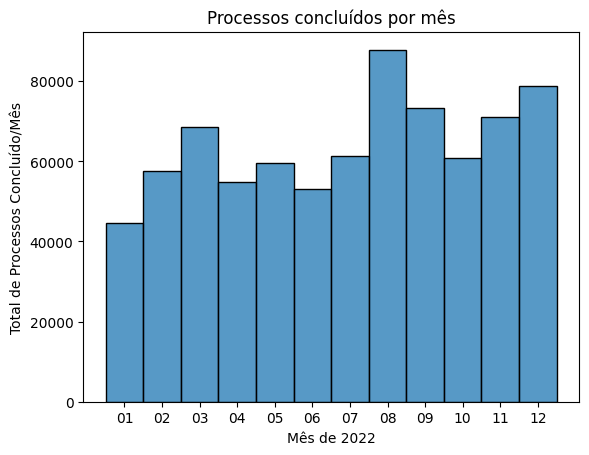

In [20]:
#Gráfico em Histograma de Total de Processos Concedidos por Mês
ax= sns.histplot(df_ben['Competência'])
#color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'gray','salmon','skyblue','pink','orange']
#for i in range(0,12):
#    ax.patches[i].set_facecolor(color[i])
plt.title('Processos concluídos por mês')
plt.xlabel('Mês de 2022')
plt.ylabel('Total de Processos Concluído/Mês') 

Text(0.5, 0, 'Mês de 2022')

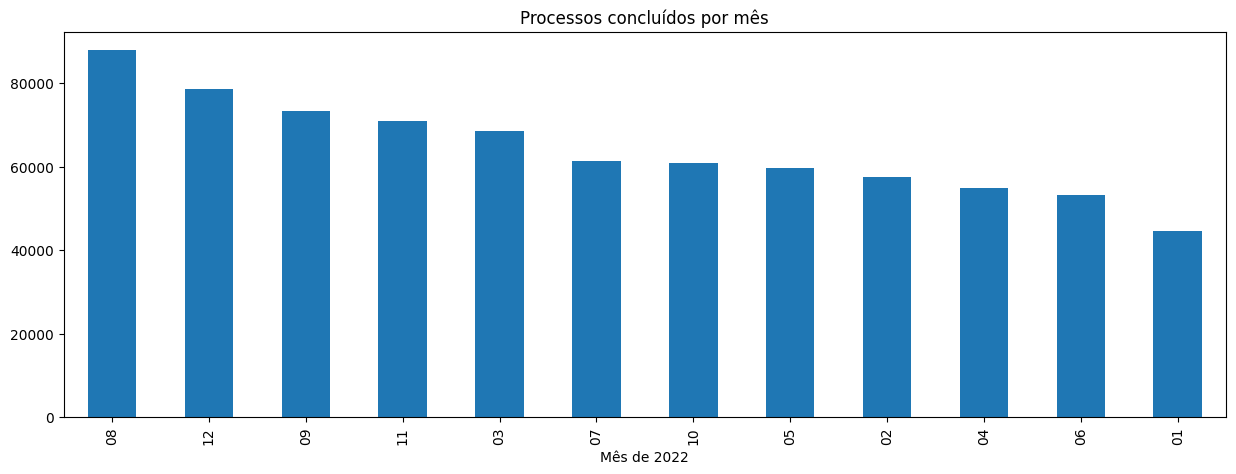

In [21]:
#Gráfico Total de Processos Concedidos por ordem de mês com a maior quantidade de benefícios concedidos
competencia = df_ben['Competência'].value_counts() #
competencia.plot(figsize=(15,5),kind='bar')
plt.title('Processos concluídos por mês')
plt.xlabel('Mês de 2022')

Plotado os gráficos, podemos verificar a Qtd de processos por Competência. Podemos verificar que o mês de Agosto (08) é o que tem mais processos concluídos e o mês de Janeiro (01) do menor.

Text(0.5, 0, 'Espécies')

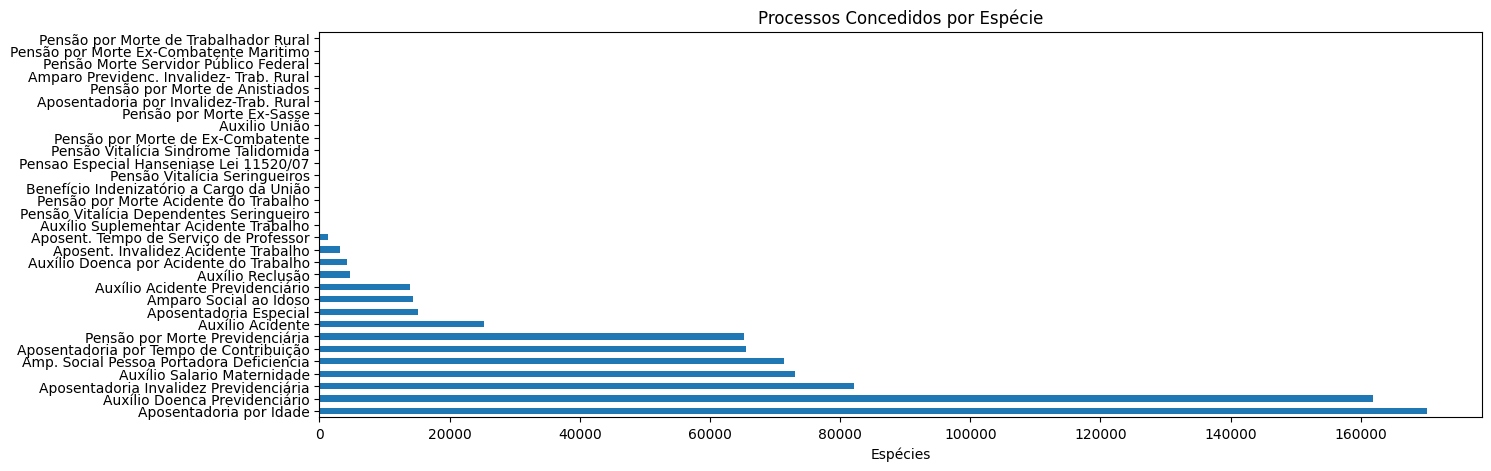

In [22]:
#Barra H do Total de Processos Concedidos por Espécies
competencia = df_ben['Espécie'].value_counts()
competencia.plot(figsize=(15,5), kind='barh', subplots = True)
plt.title('Processos Concedidos por Espécie')
plt.xlabel('Espécies')

Como temos Espécies com valores muito altos, as espécis com valores baixo não aparecem no gráfico acima, desta forma, iremos fazer um novo gráfico com valores **abaixo de 1000**.

Text(0.5, 0, 'Espécies')

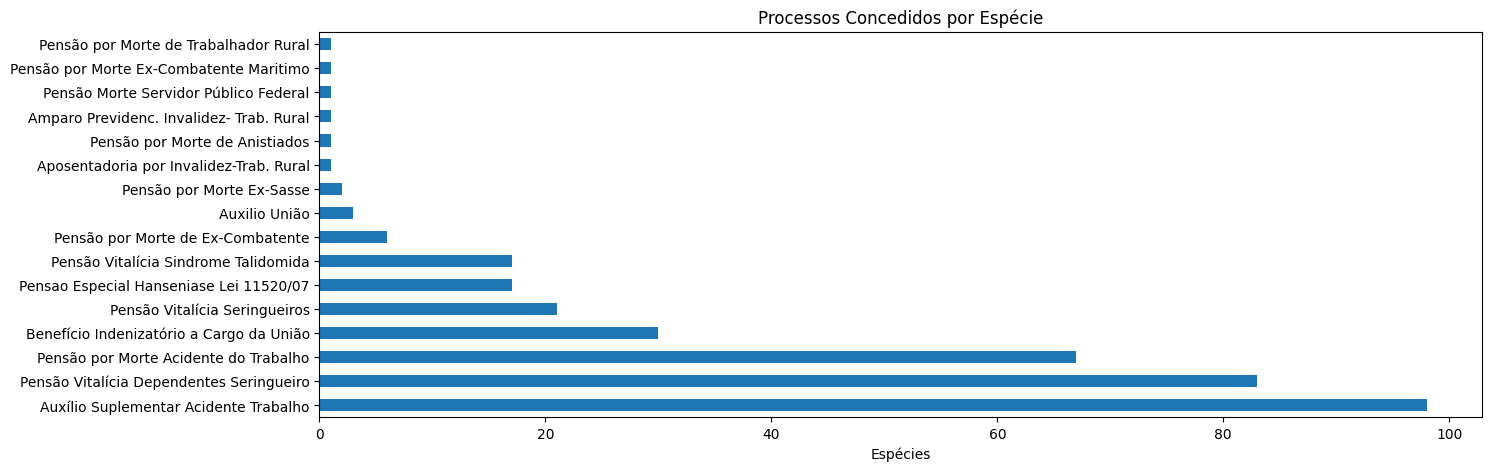

In [23]:
competencia2 = df_ben['Espécie'].value_counts()[df_ben['Espécie'].value_counts()< 1000]   #df_ben.loc[competencia< 1000:]
competencia2.plot(figsize=(15,5), kind='barh', subplots = True)
plt.title('Processos Concedidos por Espécie')
plt.xlabel('Espécies')

Text(0.5, 0, 'Sexo')

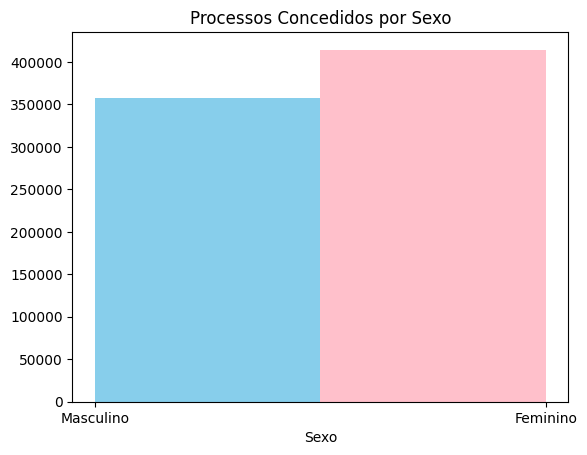

In [24]:
#Gráfico em Histograma de processos concluídos por Sexo
fig, ax = plt.subplots()
cor = ['skyblue','pink']
ax.hist(df_ben['Sexo'], bins=2) 
for i in range(0,2):
    ax.patches[i].set_facecolor(cor[i])
ax.set_title('Processos Concedidos por Sexo')
ax.set_xlabel('Sexo')

Text(0.5, 0, 'Filiação')

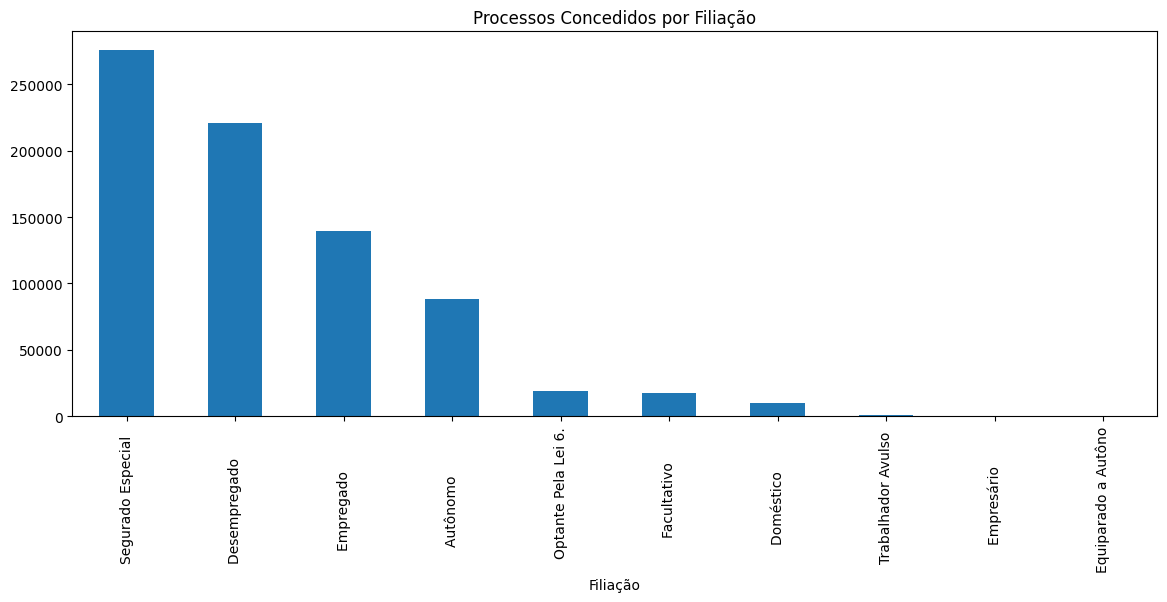

In [25]:
#Gráfico do Total de Processos Concedidos por Filiação
#df_ben['Filiação'].unique()
#plt.style.use('fivethirtyeight')
filiacao = df_ben['Filiação'].value_counts()
filiacao.plot(figsize=(14,5), kind='bar')
plt.title('Processos Concedidos por Filiação')
plt.xlabel('Filiação')

Text(0.5, 0, 'Estado')

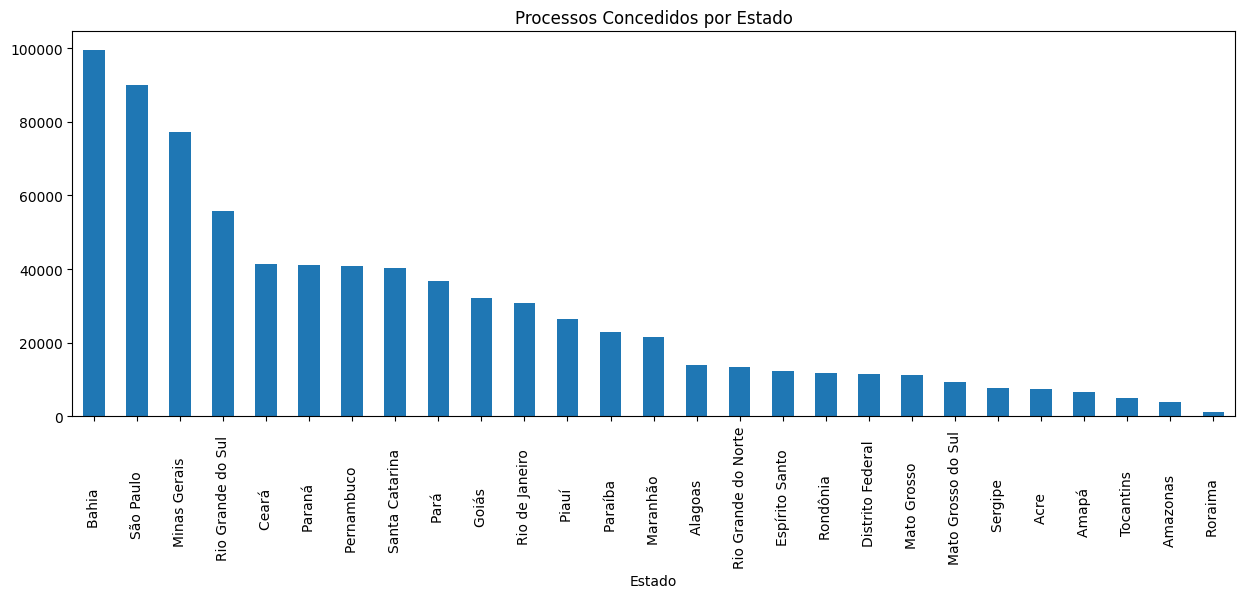

In [26]:
#Gráfico em Barra do Total de Processos Concedidos por Estado(UF)
estado = df_ben['UF'].value_counts()
estado.plot(figsize=(15,5), kind='bar')
plt.title('Processos Concedidos por Estado')
plt.xlabel('Estado')

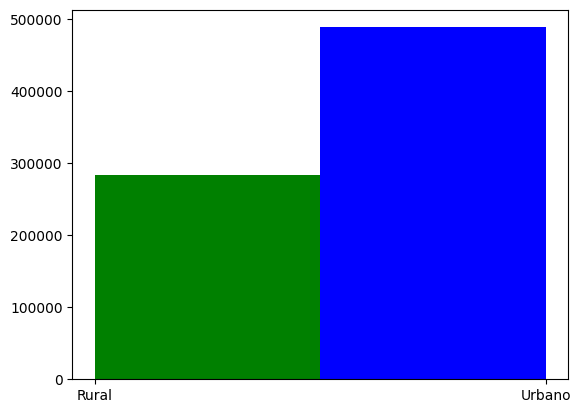

In [27]:
#Gráfico em Histograma do Total de Processos Concedidos por Zona
fig, ax = plt.subplots()
ax.hist(df_ben['Zona'], bins=2)
cor=['green','blue']
for i in range(0,2):
    ax.patches[i].set_facecolor(cor[i])

Podemos verificar que a maior parte dos Processos Concedidos são: da Espécie de Aposentadoria por Idade, Sexo Feminno, Filiação Segurado Especial, do Estado da Bahia e Zona Urbana.

Text(0, 0.5, 'QTD Salário Minimo RMI')

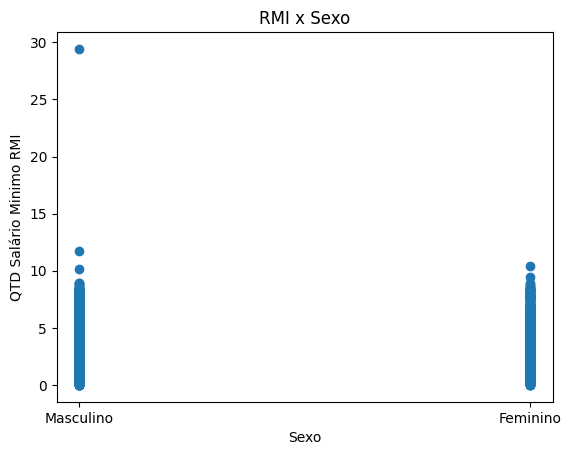

In [28]:
#Gráfico de Dispersão Sexo por Qt SM RMI
plt.scatter(df_ben['Sexo'],df_ben['Qt SM RMI'])
plt.title('RMI x Sexo')
plt.xlabel('Sexo')
plt.ylabel('QTD Salário Minimo RMI')

Text(0, 0.5, 'Mês')

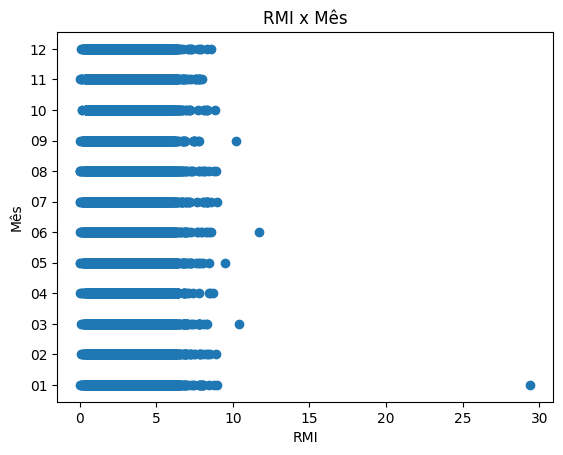

In [29]:
#Gráfico de Dispersão Qt SM RMI x Competência (Mês)
plt.scatter(df_ben['Qt SM RMI'],df_ben['Competência'])
plt.title('RMI x Mês')
plt.xlabel('RMI')
plt.ylabel('Mês')

O RMI do Sexo Masculino é ligeiramente maior. O SM do RMI dificil de estimar a competência em que esteve mais alta através do gráfico de Dispersão. 

Text(0.5, 1.0, 'Quantidade de Salário Mínimo em 2022')

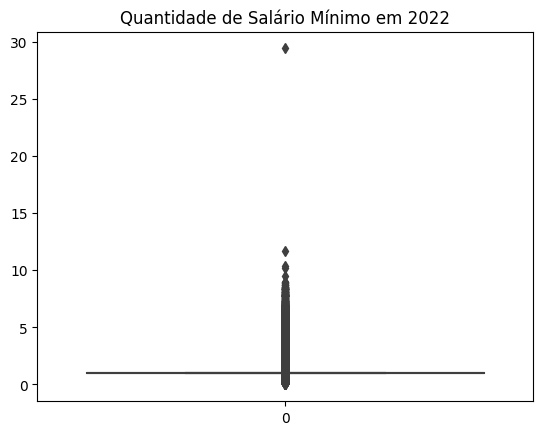

In [30]:
#Gráfico Boxplot da Quantidade de Salário Mínimo
sns.boxplot(data = df_ben['Qt SM RMI'])
plt.title('Quantidade de Salário Mínimo em 2022')

(12, 1)

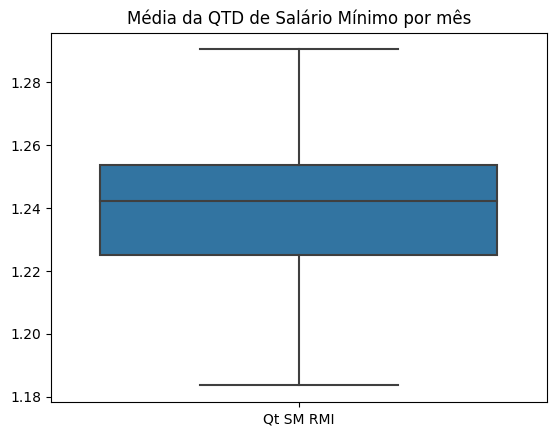

In [31]:
#Gráfico Boxplot da Média de Salário Mínimo RMI por mês
rmi_mes = df_ben.loc[:,['Competência','Qt SM RMI']]
rmi_mes = rmi_mes.groupby('Competência').mean()
sns.boxplot(data = rmi_mes)
plt.title('Média da QTD de Salário Mínimo por mês')
display(rmi_mes.shape)

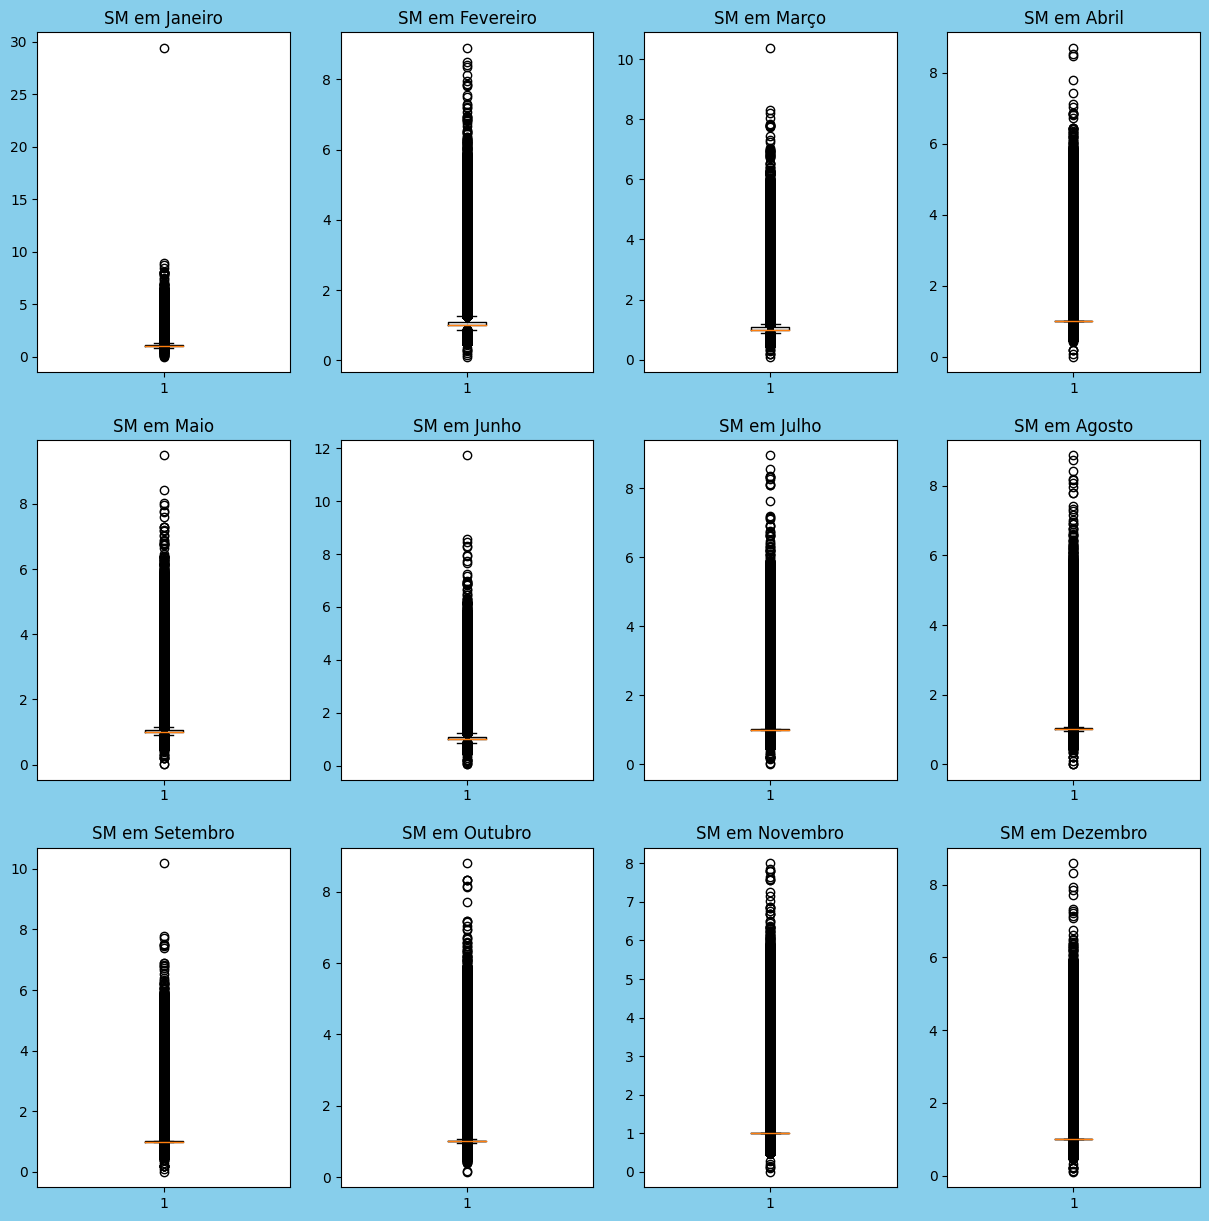

In [32]:
#Boxplots da QTD de Salário Mínimo RMI por mês
fig, ax = plt.subplots(3,4, figsize = (15, 15),facecolor='skyblue') #facecolor='#B3C7D6'

# subplot1: boxplot
competencia_var = df_ben['Competência'].unique()
y = 0
z = 0
for i, mes in enumerate(competencia_var):
    meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
    y= i%4
    z= i//4
    rmi_01 = df_ben.loc[df_ben['Competência'] == mes,['Competência','Qt SM RMI']]
    ax[z,y].boxplot(rmi_01['Qt SM RMI'])
    ax[z,y].set_title(f'SM em {meses[i]}')
    #print(i,z,y)
        

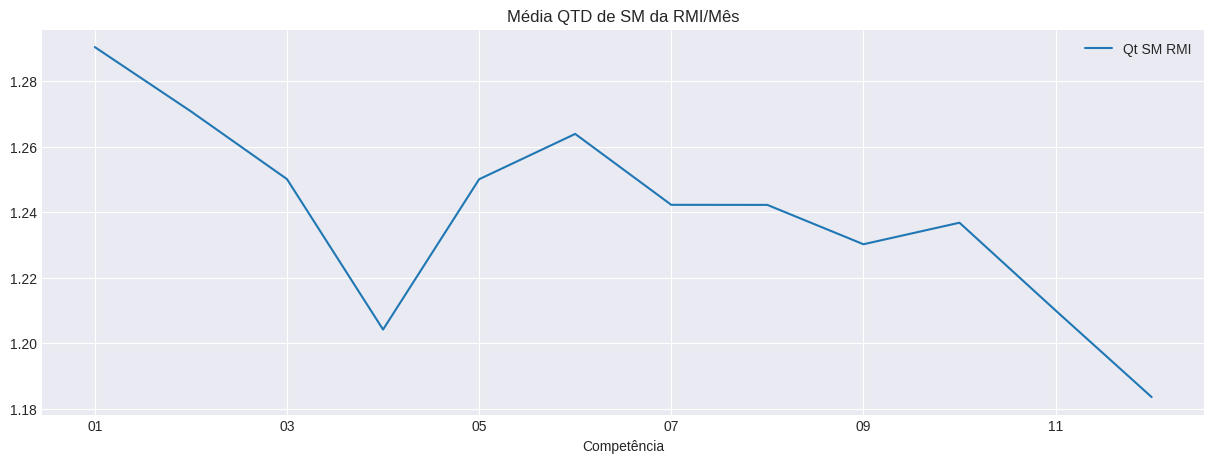

In [33]:
#Gráfico de Linhas da QTD de SM da RMI por mês
plt.style.use('seaborn-v0_8-darkgrid')
rmi_mes.plot(figsize=(15,5), kind='line')
#plt.scatter(['Competência',rmi_mes], color='red')
plt.title('Média QTD de SM da RMI/Mês')
plt.legend();

Text(0.5, 1.0, 'Densidade Média do RMI')

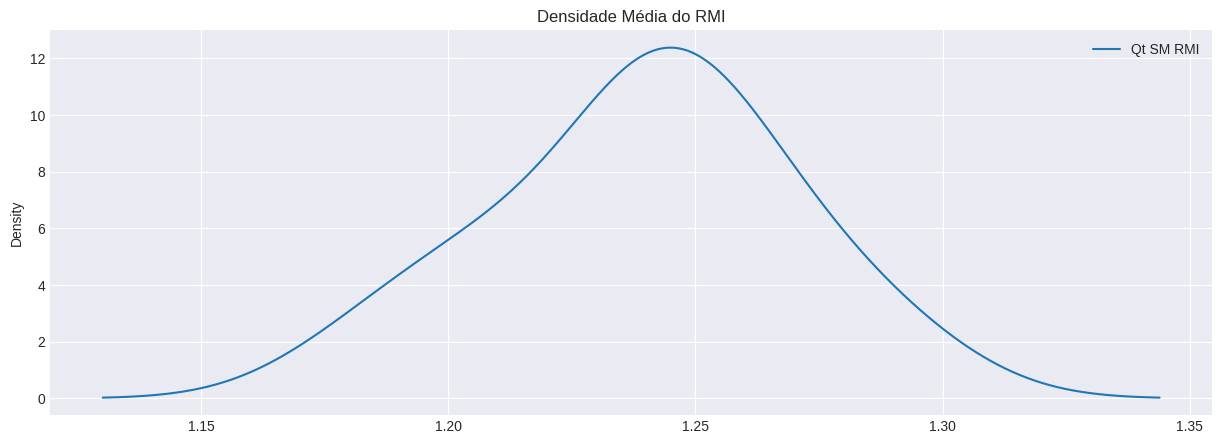

In [34]:
#Gráfico de Densidade da Média da QTD de SM da RMI
rmi_mes.plot(figsize=(15,5), kind='kde')
plt.title('Densidade Média do RMI')

Text(0.5, 1.0, 'Média do SM RMI x Estado')

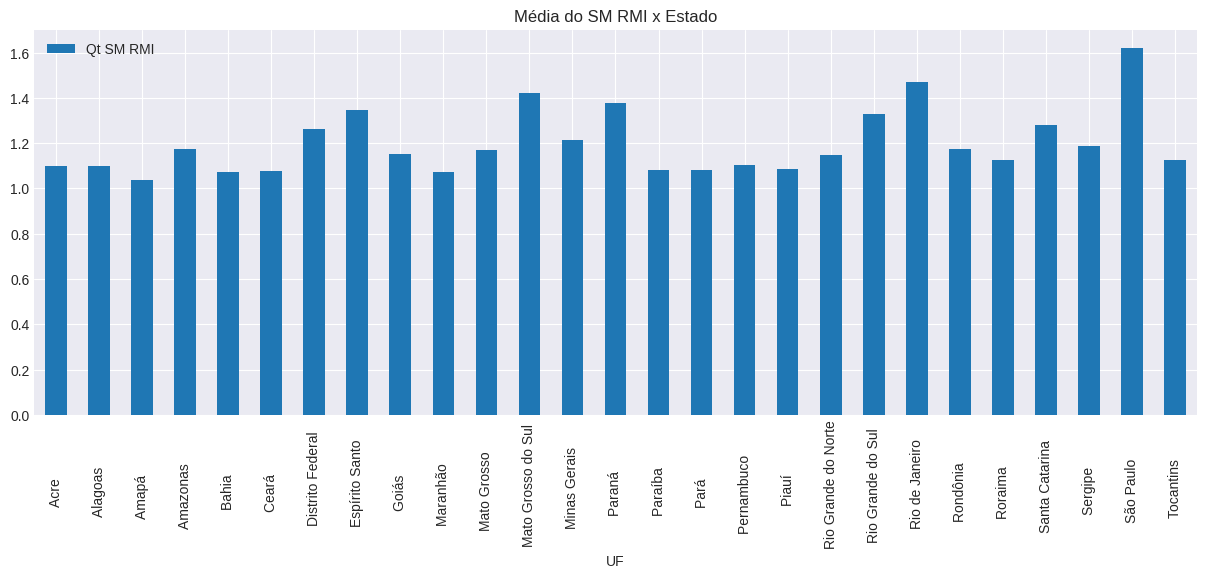

In [35]:
#Gráfico Barra Média de SM do RMI x Estado
rmi_est = df_ben.loc[:,['UF','Qt SM RMI']]
rmi_est = rmi_est.groupby('UF').mean()
rmi_est.plot(figsize=(15,5), kind='bar')
plt.title('Média do SM RMI x Estado')

A maior média de SM RMI é do mês de Janeiro, e a densidade média do RMI fica entre 1.4 e 1.44. Os estados com os maiores SM RMI são DF e SP.

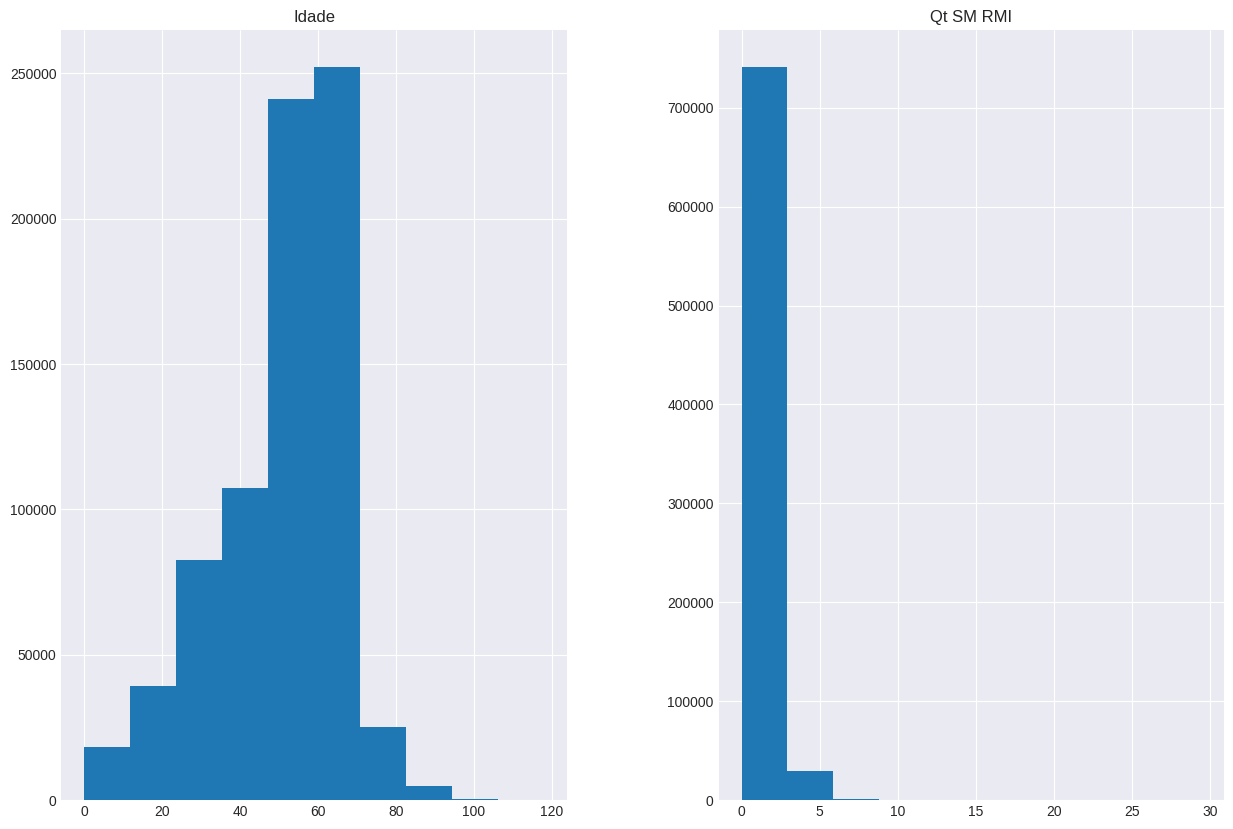

In [36]:
df_ben.hist(figsize = (15,10));

In [37]:
#Verificando a Quantidade de Processo Concedido por Espécie para cada sexo
df_ben2 = df_ben[df_ben['Sexo'] == 'Masculino'].groupby('Espécie').agg({'Sexo':'count'})
df_ben3 = df_ben[df_ben['Sexo'] == 'Feminino'].groupby('Espécie').agg({'Sexo':'count'})
display(df_ben2[:3])
display(df_ben3[:3])


,Sexo
Espécie,
Amp. Social Pessoa Portadora Deficiencia,39438
Amparo Previdenc. Invalidez- Trab. Rural,1
Amparo Social ao Idoso,6316


,Sexo
Espécie,
Amp. Social Pessoa Portadora Deficiencia,31930
Amparo Social ao Idoso,8107
Aposent. Invalidez Acidente Trabalho,940


Text(0.5, 1.0, 'Espécie por Sexo - Feminino')

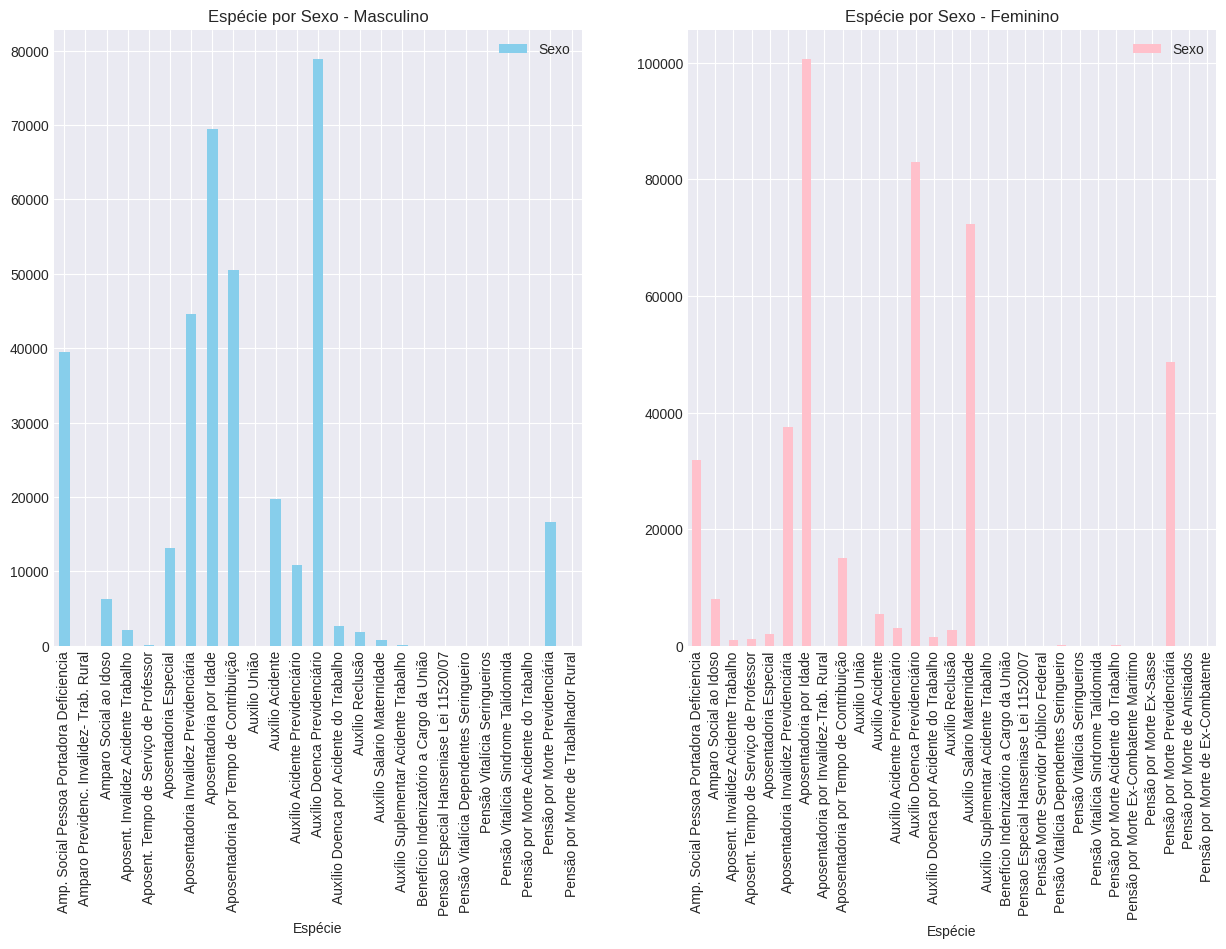

In [38]:
#Gráfico em Barras da Quantidade de Processo Concedido por Espécie, separando os sexos
fig, axes=plt.subplots(1,2,figsize=(15,8))
df_ben2.plot(kind='bar',color={"Skyblue"},ax=axes[0]) #figsize=(10,5) ,subplots = True, layout = (1,2)
axes[0].set_title('Espécie por Sexo - Masculino')
df_ben3.plot(kind='bar',color={"pink"},ax=axes[1]) #figsize=(10,5),subplots = True, layout = (2,1)
axes[1].set_title('Espécie por Sexo - Feminino')

Tanto no Sexo masculino, quanto no feminino a maior parte dos benefícios são concedidos com Despacho Normal.

<Axes: >

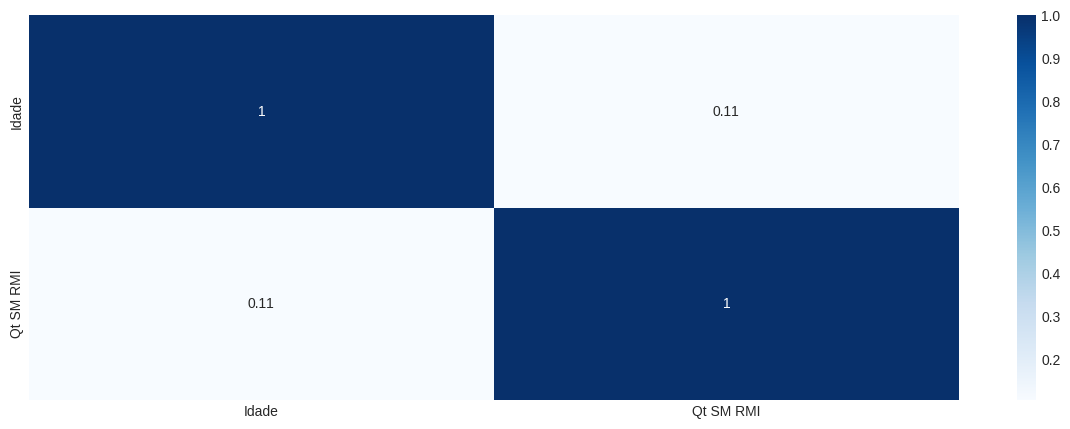

In [39]:
#Gráfico de correlação da Base de Dados de Benefícios
plt.figure(figsize=(15,5))
sns.heatmap(df_ben.corr(),annot= True,cmap='Blues')#cmap='RdBu'

Como podemos ver, não há muita correlaçao entre os atributos numéricos da base

Text(0.5, 1.0, 'Média de SM do RMI x Sexo')

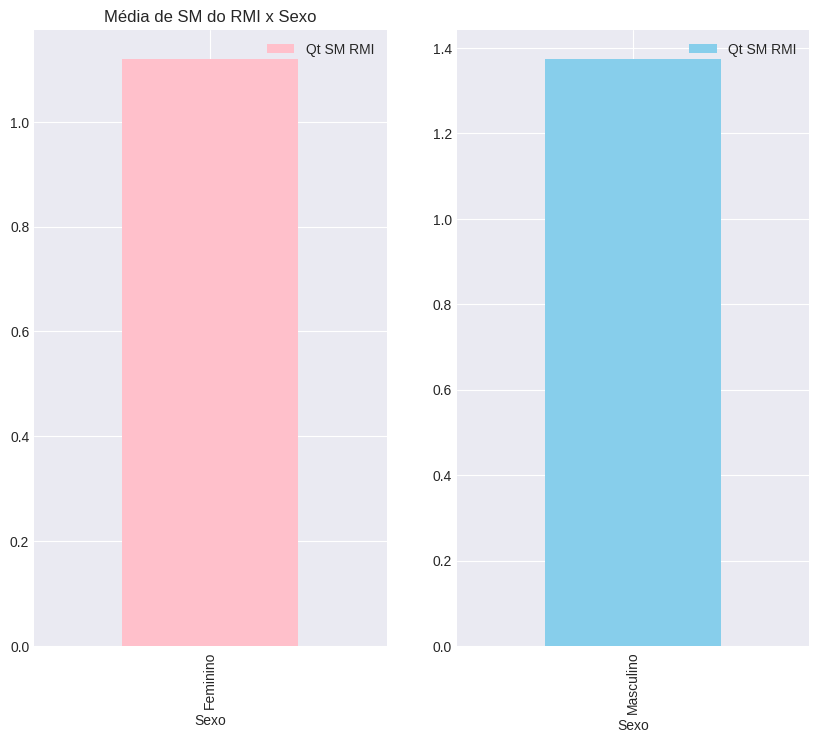

In [40]:
#Média de SM da RMI por Sexo
df_ben4 = df_ben[df_ben['Sexo'] == 'Masculino'].groupby('Sexo').agg({'Qt SM RMI':'mean'})
df_ben3 = df_ben.loc[:,['Sexo','Qt SM RMI']]
df_ben3 = df_ben[df_ben['Sexo'] == 'Feminino'].groupby('Sexo').agg({'Qt SM RMI':'mean'})
f, axes = plt.subplots(1, 2)
df_ben3.plot(figsize=(10,8), kind='bar', ax=axes[0],color={"pink"})
df_ben4.plot(figsize=(10,8), kind='bar', ax=axes[1],color={"Skyblue"})
axes[0].set_title('Média de SM do RMI x Sexo')

Text(0.5, 1.0, 'SM Máximo do RMI x Sexo')

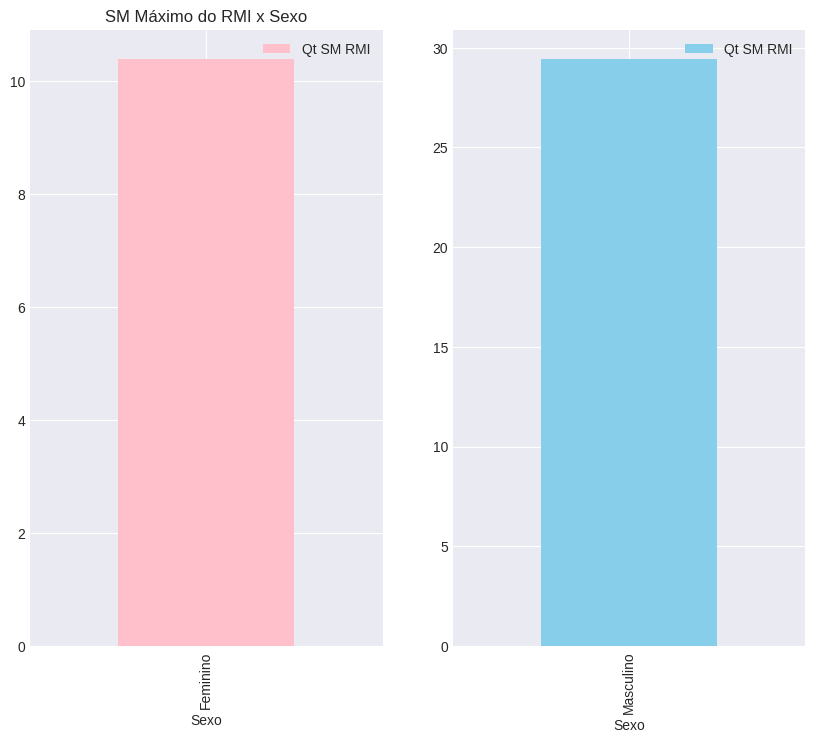

In [41]:
#SM Máximo da RMI por Sexo
df_ben4 = df_ben[df_ben['Sexo'] == 'Masculino'].groupby('Sexo').agg({'Qt SM RMI':'max'})
df_ben3 = df_ben.loc[:,['Sexo','Qt SM RMI']]
df_ben3 = df_ben[df_ben['Sexo'] == 'Feminino'].groupby('Sexo').agg({'Qt SM RMI':'max'})
f, axes = plt.subplots(1, 2)
df_ben3.plot(figsize=(10,8), kind='bar', ax=axes[0],color={"pink"})
df_ben4.plot(figsize=(10,8), kind='bar', ax=axes[1],color={"Skyblue"})
axes[0].set_title('SM Máximo do RMI x Sexo')

Text(0.5, 1.0, 'Soma da Qtd SM do RMI x Sexo')

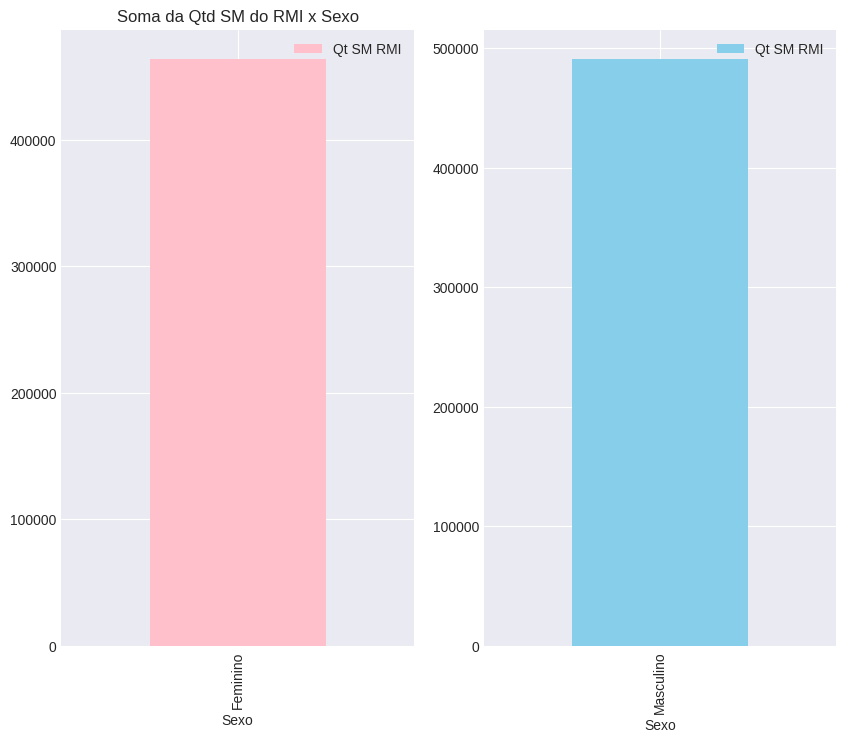

In [42]:
#SM Mínimo da RMI por Sexo
df_ben4 = df_ben[df_ben['Sexo'] == 'Masculino'].groupby('Sexo').agg({'Qt SM RMI':'sum'})
df_ben3 = df_ben.loc[:,['Sexo','Qt SM RMI']]
df_ben3 = df_ben[df_ben['Sexo'] == 'Feminino'].groupby('Sexo').agg({'Qt SM RMI':'sum'})
f, axes = plt.subplots(1, 2)
df_ben3.plot(figsize=(10,8), kind='bar', ax=axes[0],color={"pink"})
df_ben4.plot(figsize=(10,8), kind='bar', ax=axes[1],color={"Skyblue"})
axes[0].set_title('Soma da Qtd SM do RMI x Sexo')

Podemos verificar que o Salário Masculino é maior na média do RMI e que o maior Salário do benefício é masculino.

## 4 - ML - Treino e Teste

---



Devido ao tamanho da planilha, a mesma será filtrada apenas para processos com Ação Judicial, pois com o tamanho total da planilha está estourando a memória no Colab

In [43]:
#Redução do DF para processos com Ação Judicial
#df_ben = df_ben[df_ben['Despacho'] == 'Acao Judicial']
#df_ben

In [44]:
# Separando os valores do dataset em componentes de input (X) e output (Y)
X = df_ben.values[:,0:9]
Y = df_ben.values[:,9]

In [45]:
print(X)

[['01' 'Auxílio Doenca Previdenciário' 'Em Branco' ...
  'Maceió                          ' 'AL' 'Segurado Especial  ']
 ['01' 'Auxílio Doenca Previdenciário' 'Em Branco' ...
  'Maceió                          ' 'AL' 'Autônomo           ']
 ['01' 'Auxílio Doenca Previdenciário' 'Em Branco' ...
  'Maceió                          ' 'AL' 'Autônomo           ']
 ...
 ['12' 'Auxílio Doenca Previdenciário' 'Em Branco' ...
  'Cachoeira Dourada               ' 'GO' 'Desempregado       ']
 ['12' 'Aposentadoria por Idade' 'Zerados' ...
  'Paranã                          ' 'TO' 'Segurado Especial  ']
 ['12' 'Aposentadoria por Idade' 'Zerados' ...
  'Jaru                            ' 'RO' 'Segurado Especial  ']]


In [46]:
# ordinal encoding para os atributos X
encoded_X = OrdinalEncoder().fit_transform(X)

# exibindo os dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[0.000e+00 1.300e+01 3.610e+02 5.700e+01 1.000e+00 0.000e+00 2.682e+03
  1.000e+00 8.000e+00]
 [0.000e+00 1.300e+01 3.610e+02 5.200e+01 1.000e+00 1.000e+00 2.682e+03
  1.000e+00 0.000e+00]
 [0.000e+00 1.300e+01 3.610e+02 4.500e+01 0.000e+00 1.000e+00 2.682e+03
  1.000e+00 0.000e+00]
 [0.000e+00 9.000e+00 1.938e+03 5.600e+01 1.000e+00 1.000e+00 2.682e+03
  1.000e+00 1.000e+00]
 [0.000e+00 1.300e+01 3.610e+02 4.800e+01 1.000e+00 0.000e+00 3.565e+03
  1.000e+00 8.000e+00]]


In [47]:
df_ben

,Competência,Espécie,CID,Idade,Sexo,Zona,Municipio Resid,UF Resid,Filiação,UF,Qt SM RMI
0,01,Auxílio Doenca Previdenciário,Em Branco,57,Masculino,Rural,Maceió,AL,Segurado Especial,Alagoas,1.000
1,01,Auxílio Doenca Previdenciário,Em Branco,52,Masculino,Urbano,Maceió,AL,Autônomo,Alagoas,1.000
2,01,Auxílio Doenca Previdenciário,Em Branco,45,Feminino,Urbano,Maceió,AL,Autônomo,Alagoas,1.100
3,01,Aposentadoria por Tempo de Contribuição,Zerados,56,Masculino,Urbano,Maceió,AL,Desempregado,Alagoas,1.000
4,01,Auxílio Doenca Previdenciário,Em Branco,48,Masculino,Rural,Piaçabuçu,AL,Segurado Especial,Alagoas,1.000
...,...,...,...,...,...,...,...,...,...,...,...
781003,12,Aposentadoria por Idade,Zerados,61,Masculino,Rural,Mucajaí,RR,Segurado Especial,Rondônia,1.000
781004,12,Aposentadoria por Idade,Zerados,60,Masculino,Rural,Breu Branco,PA,Segurado Especial,Rondônia,1.000
781005,12,Auxílio Doenca Previdenciário,Em Branco,48,Masculino,Urbano,Cachoeira Dourada,GO,Desempregado,Rondônia,1.479
781006,12,Aposentadoria por Idade,Zerados,67,Masculino,Rural,Paranã,TO,Segurado Especial,Rondônia,1.000


In [48]:
# one hot encode para os atributos X
encoded_X = OneHotEncoder(sparse=False).fit_transform(X)

# exibindo os dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :])

Atributos transformados:
[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]]


In [49]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, random_state=10)

In [50]:
X_treino

array([['04', 'Aposentadoria por Idade', 'Zerados', ...,
        'Feira de Santana                ', 'BA', 'Segurado Especial  '],
       ['12', 'Auxílio Doenca Previdenciário', 'Em Branco', ...,
        'Itapuca                         ', 'RS', 'Desempregado       '],
       ['06', 'Auxílio Doenca Previdenciário', 'Em Branco', ...,
        'São Francisco de Paula          ', 'RS', 'Desempregado       '],
       ...,
       ['08', 'Auxílio Doenca Previdenciário', 'Em Branco', ...,
        'Machado                         ', 'MG', 'Autônomo           '],
       ['12', 'Aposentadoria por Idade', 'Zerados', ...,
        'Aporá                           ', 'BA', 'Segurado Especial  '],
       ['07', 'Aposentadoria Invalidez Previdenciária', 'Zerados', ...,
        'Conceição das Alagoas           ', 'MG', 'Autônomo           ']],
      dtype=object)